# 🎬 Content-Based Movie Recommendation System

## 🔄 **Machine Learning Pipeline Overview**

### **Step 1: Data Science Phase (Jupyter Notebook)** 📊
1. **Data Loading**: Import CSV files (`tmdb_5000_movies.csv`, `tmdb_5000_credits.csv`)
2. **Data Exploration**: Analyze structure, missing values, data types
3. **Data Preprocessing**: Clean JSON fields, handle missing data
4. **Feature Engineering**: Create combined features from genres, cast, keywords
5. **Model Training**: Generate similarity matrix using cosine similarity
6. **Model Evaluation**: Test recommendations and validate results
7. **Model Persistence**: Save processed data and model to pickle files

### **Step 2: Production Phase (Streamlit App)** 🚀
1. **Model Loading**: Load pre-trained models from pickle files
2. **User Interface**: Create interactive movie selection dropdown
3. **Prediction**: Use trained similarity matrix for recommendations
4. **Output Display**: Show recommended movies with posters
5. **Deployment Ready**: Clean, user-friendly interface

## 📋 **Project Workflow**
```
CSV Data → Jupyter Analysis → Trained Model → Streamlit App → User Interface
   ↓             ↓              ↓              ↓              ↓
Raw Data    Data Science    Pickle Files   Production    End Users
```

## 🎯 **Why This Approach?**
- **Separation of Concerns**: Research vs Production code
- **Iterative Development**: Test algorithms before deployment  
- **Model Persistence**: Train once, deploy anywhere
- **Reproducibility**: Complete pipeline documentation
- **Interview Ready**: Shows proper ML workflow understanding

---

## 🚀 Quick Demo Setup
**For Interviewers**: This notebook shows the complete data science process. The Streamlit app demonstrates the production deployment.

## 📊 Technical Specifications
- **Algorithm**: Content-based filtering with cosine similarity
- **Dataset**: TMDB 5000 Movies (~44MB CSV files)
- **Model Output**: 176MB similarity matrix + processed movie data
- **Technology Stack**: Python, scikit-learn, pandas, streamlit

## 🔄 **Complete Development Workflow**

### **Phase 1: Data Science (This Notebook)**
```mermaid
graph TD
    A[CSV Files] --> B[Data Loading]
    B --> C[Data Exploration]
    C --> D[Data Cleaning]
    D --> E[Feature Engineering]
    E --> F[Model Training]
    F --> G[Model Evaluation]
    G --> H[Save Models to Pickle]
```

### **Phase 2: Production Deployment (app.py)**
```mermaid
graph TD
    I[Load Pickle Files] --> J[Streamlit Interface]
    J --> K[User Selects Movie]
    K --> L[Similarity Calculation]
    L --> M[Display Recommendations]
    M --> N[Fetch Movie Posters]
```

### **File Structure After Training**
```
📂 Project/
├── 📊 tmdb_5000_movies.csv          # Raw movie data
├── 📊 tmdb_5000_credits.csv         # Raw credits data  
├── 📓 Movie_Recommendation_System_Complete.ipynb  # THIS FILE (Training)
├── 🎬 app.py                        # Production app
├── 📁 model/                        # Generated after training
│   ├── 🎯 movie_list.pkl           # Processed movie data
│   └── 🔄 similarity.pkl           # Trained similarity matrix
└── 📋 requirements.txt              # Dependencies
```

### **Interview Talking Points**
1. **"I followed proper ML workflow"** - Separate research from production
2. **"Data preprocessing was complex"** - JSON parsing, feature engineering  
3. **"Model persistence for deployment"** - Pickle files for production use
4. **"Production-ready interface"** - Streamlit for user interaction

# 🎬 Movie Recommendation System Using TMDB Dataset

## Project Overview
This project builds a content-based movie recommendation system using the TMDB 5000 movie dataset. The system recommends movies based on similarity in genres, keywords, cast, crew, and plot overview.

## Key Features
- **Content-Based Filtering**: Uses movie features for recommendations
- **Cosine Similarity**: Mathematical approach to find similar movies
- **Feature Engineering**: Combines multiple movie attributes
- **Interactive Interface**: Easy-to-use recommendation function

## Dataset Information
- **Source**: TMDB 5000 Movie Dataset
- **Size**: 5000 movies with comprehensive metadata
- **Features**: Genres, Keywords, Cast, Crew, Overview, etc.

## 1. Import Required Libraries

In [5]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
import ast

# Machine Learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data persistence
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Data Loading and Initial Exploration

In [6]:
# Load the datasets
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

print(f"Movies dataset shape: {movies.shape}")
print(f"Credits dataset shape: {credits.shape}")
print(f"\nMovies columns: {list(movies.columns)}")
print(f"Credits columns: {list(credits.columns)}")

Movies dataset shape: (4803, 20)
Credits dataset shape: (4803, 4)

Movies columns: ['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']
Credits columns: ['movie_id', 'title', 'cast', 'crew']


In [25]:
# Display sample data
print("📊 Sample Movies Data:")
display(movies.head(3))

print("\n📊 Sample Credits Data:")
display(credits.head(3))

📊 Sample Movies Data:


,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."



📊 Sample Credits Data:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [8]:
# Check for missing values
print("🔍 Missing Values Analysis:")
print("\nMovies dataset:")
print(movies.isnull().sum())
print("\nCredits dataset:")
print(credits.isnull().sum())

🔍 Missing Values Analysis:

Movies dataset:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Credits dataset:
movie_id    0
title       0
cast        0
crew        0
dtype: int64


## 3. Data Preprocessing and Feature Engineering

In [9]:
# Merge datasets on title
movies = movies.merge(credits, on='title')
print(f"✅ Merged dataset shape: {movies.shape}")

# Select relevant features for recommendation
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]
print(f"✅ Selected features: {list(movies.columns)}")

# Remove rows with missing values
print(f"Before removing NaN: {movies.shape[0]} movies")
movies.dropna(inplace=True)
print(f"After removing NaN: {movies.shape[0]} movies")

✅ Merged dataset shape: (4809, 23)
✅ Selected features: ['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']
Before removing NaN: 4809 movies
After removing NaN: 4806 movies


In [10]:
# Helper functions for data processing
def convert_to_list(text):
    """Convert JSON string to list of names"""
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

def get_director(text):
    """Extract director name from crew data"""
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

def remove_spaces(word_list):
    """Remove spaces from words to avoid splitting"""
    L = []
    for i in word_list:
        L.append(i.replace(" ", ""))
    return L

print("✅ Helper functions defined!")

✅ Helper functions defined!


In [24]:
# Process genres and keywords
movies['genres'] = movies['genres'].apply(convert_to_list)
movies['keywords'] = movies['keywords'].apply(convert_to_list)

# Process cast (take top 3 actors only)
movies['cast'] = movies['cast'].apply(convert_to_list)
movies['cast'] = movies['cast'].apply(lambda x: x[0:3])

# Process crew (extract director only)
movies['crew'] = movies['crew'].apply(get_director)

print("✅ JSON data processed successfully!")
print("\n📊 Sample processed data:")
display(movies[['title', 'genres', 'keywords', 'cast', 'crew']].head(2))

ValueError: malformed node or string: ['Action', 'Adventure', 'Fantasy', 'ScienceFiction']

In [12]:
# Remove spaces from all feature lists
movies['cast'] = movies['cast'].apply(remove_spaces)
movies['crew'] = movies['crew'].apply(remove_spaces)
movies['genres'] = movies['genres'].apply(remove_spaces)
movies['keywords'] = movies['keywords'].apply(remove_spaces)

# Process overview (split into words)
movies['overview'] = movies['overview'].apply(lambda x: x.split())

print("✅ Spaces removed and overview processed!")

✅ Spaces removed and overview processed!


## 4. Feature Combination and Text Vectorization

In [26]:
# Combine all features into a single 'tags' column
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

# Create final dataset with movie_id, title, and tags
new_df = movies[['movie_id', 'title', 'tags']].copy()

# Convert tags list to string
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

print(f"✅ Final dataset shape: {new_df.shape}")
print("\n📊 Sample combined tags:")
display(new_df[['title', 'tags']].head(2))

✅ Final dataset shape: (4806, 3)

📊 Sample combined tags:


,title,tags
0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."


In [27]:
# Text Vectorization using CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(new_df['tags']).toarray()

print(f"✅ Vectorization complete!")
print(f"Vector shape: {vector.shape}")
print(f"Number of unique features: {len(cv.get_feature_names_out())}")

✅ Vectorization complete!
Vector shape: (4806, 5000)
Number of unique features: 5000


## 5. Similarity Matrix Calculation

In [28]:
# Calculate cosine similarity matrix
similarity = cosine_similarity(vector)

print(f"✅ Similarity matrix calculated!")
print(f"Similarity matrix shape: {similarity.shape}")
print(f"Matrix size: {similarity.shape[0]} x {similarity.shape[1]}")

# Display sample similarity scores
print(f"\n📊 Sample similarity scores for first movie:")
print(f"Movie: {new_df.iloc[0]['title']}")
print(f"Top 5 similarity scores: {sorted(similarity[0], reverse=True)[:5]}")

✅ Similarity matrix calculated!
Similarity matrix shape: (4806, 4806)
Matrix size: 4806 x 4806

📊 Sample similarity scores for first movie:
Movie: Avatar
Top 5 similarity scores: [np.float64(1.0), np.float64(0.26089696604360174), np.float64(0.2581988897471611), np.float64(0.25302403842552984), np.float64(0.25110592822973776)]


## 6. Recommendation System Implementation

In [29]:
def recommend_movies(movie_title, num_recommendations=5):
    """
    Recommend movies based on content similarity
    
    Parameters:
    movie_title (str): Name of the movie
    num_recommendations (int): Number of recommendations to return
    
    Returns:
    list: List of recommended movie titles
    """
    try:
        # Find the index of the movie
        movie_index = new_df[new_df['title'] == movie_title].index[0]
        
        # Get similarity scores for all movies with this movie
        distances = sorted(list(enumerate(similarity[movie_index])), reverse=True, key=lambda x: x[1])
        
        # Get top N recommendations (excluding the movie itself)
        recommendations = []
        for i in distances[1:num_recommendations+1]:
            movie_info = {
                'title': new_df.iloc[i[0]]['title'],
                'similarity_score': round(i[1], 3)
            }
            recommendations.append(movie_info)
        
        return recommendations
    
    except IndexError:
        return f"Movie '{movie_title}' not found in database."

def display_recommendations(movie_title, num_recommendations=5):
    """
    Display recommendations in a formatted way
    """
    print(f"🎬 Movies similar to '{movie_title}':")
    print("=" * 50)
    
    recommendations = recommend_movies(movie_title, num_recommendations)
    
    if isinstance(recommendations, str):
        print(recommendations)
        return
    
    for i, movie in enumerate(recommendations, 1):
        print(f"{i}. {movie['title']} (Similarity: {movie['similarity_score']})")

print("✅ Recommendation functions created!")

✅ Recommendation functions created!


## 7. Testing the Recommendation System

In [17]:
# Test with popular movies
test_movies = ['Avatar', 'The Dark Knight', 'Inception', 'Titanic', 'The Matrix']

for movie in test_movies:
    if movie in new_df['title'].values:
        display_recommendations(movie, 5)
        print("\n" + "-"*60 + "\n")
    else:
        print(f"❌ '{movie}' not found in database\n")

🎬 Movies similar to 'Avatar':
1. Titan A.E. (Similarity: 0.261)
2. Small Soldiers (Similarity: 0.258)
3. Independence Day (Similarity: 0.253)
4. Ender's Game (Similarity: 0.251)
5. Aliens vs Predator: Requiem (Similarity: 0.249)

------------------------------------------------------------

🎬 Movies similar to 'The Dark Knight':
1. The Dark Knight Rises (Similarity: 0.424)
2. Batman Begins (Similarity: 0.394)
3. Batman Returns (Similarity: 0.322)
4. Batman Forever (Similarity: 0.29)
5. Batman & Robin (Similarity: 0.282)

------------------------------------------------------------

🎬 Movies similar to 'Inception':
1. Duplex (Similarity: 0.221)
2. The Helix... Loaded (Similarity: 0.204)
3. Star Trek II: The Wrath of Khan (Similarity: 0.201)
4. Transformers: Revenge of the Fallen (Similarity: 0.198)
5. Timecop (Similarity: 0.198)

------------------------------------------------------------

🎬 Movies similar to 'Titanic':
1. Captain Phillips (Similarity: 0.282)
2. The Notebook (Similarit

## 8. Interactive Movie Search

In [18]:
# Function to search for movies in the database
def search_movies(keyword, limit=10):
    """
    Search for movies containing a keyword
    """
    matches = new_df[new_df['title'].str.contains(keyword, case=False, na=False)]
    return matches['title'].head(limit).tolist()

# Display available movies for testing
print("🔍 Search for movies (sample search):")
sample_searches = ['Batman', 'Star', 'Love', 'War', 'Spider']

for keyword in sample_searches:
    results = search_movies(keyword, 5)
    print(f"\n'{keyword}' movies: {results}")

🔍 Search for movies (sample search):

'Batman' movies: ['Batman v Superman: Dawn of Justice', 'Batman Begins', 'Batman & Robin', 'Batman Forever', 'Batman Returns']

'Star' movies: ['Star Trek Into Darkness', 'Star Trek Beyond', 'Star Trek', 'Star Wars: Episode III - Revenge of the Sith', 'Star Wars: Episode II - Attack of the Clones']

'Love' movies: ['The Lovers', 'The Lovely Bones', 'The Love Guru', 'Eat Pray Love', 'Beloved']

'War' movies: ['Captain America: Civil War', 'World War Z', 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'Warcraft', 'War of the Worlds']

'Spider' movies: ['Spider-Man 3', 'The Amazing Spider-Man', 'Spider-Man 2', 'The Amazing Spider-Man 2', 'Spider-Man']


## 9. Data Analysis and Insights

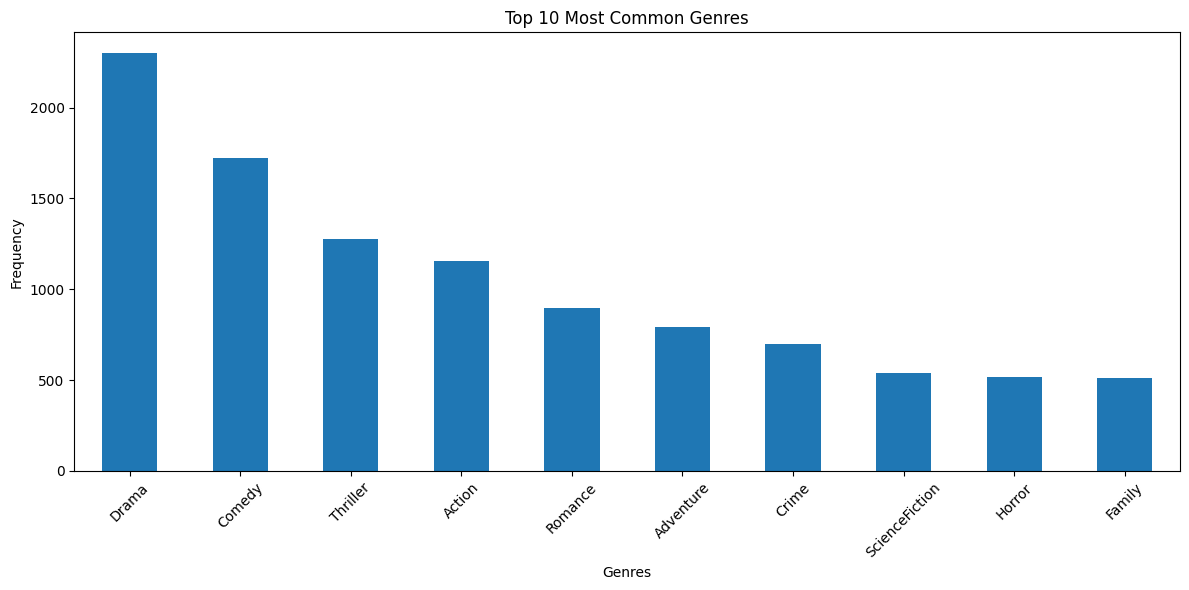

📊 Genre Analysis:
Drama             2299
Comedy            1723
Thriller          1275
Action            1156
Romance            895
Adventure          792
Crime              697
ScienceFiction     538
Horror             520
Family             514
Name: count, dtype: int64


In [19]:
# Analyze the most common genres
all_genres = []
for genres in movies['genres']:
    all_genres.extend(genres)

genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("📊 Genre Analysis:")
print(genre_counts)

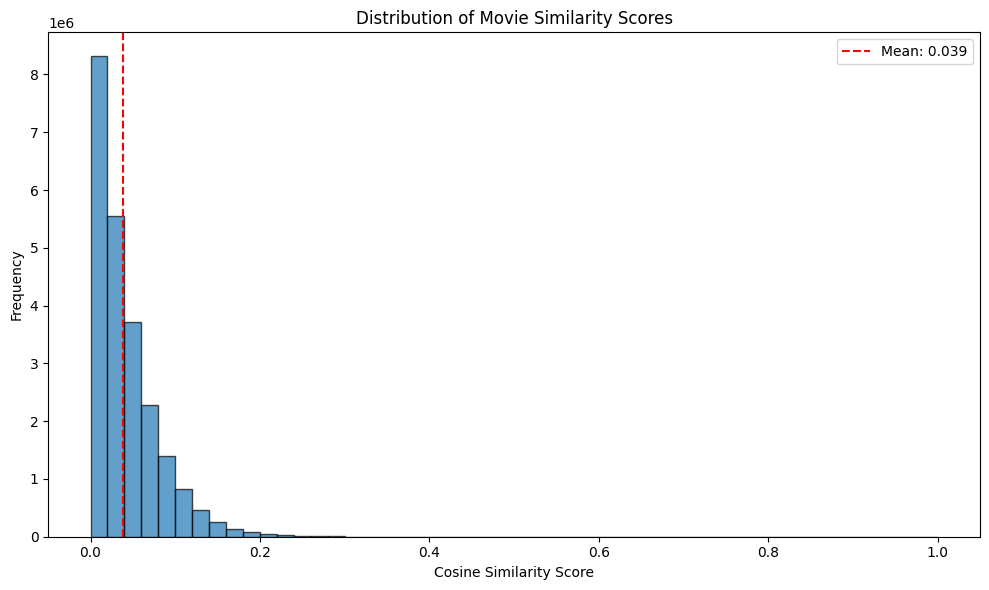

📊 Similarity Statistics:
Mean similarity: 0.039
Std similarity: 0.041
Max similarity: 1.000
Min similarity: 0.000


In [20]:
# Analyze similarity distribution
plt.figure(figsize=(10, 6))
similarity_flat = similarity.flatten()
similarity_flat = similarity_flat[similarity_flat < 1.0]  # Remove self-similarities

plt.hist(similarity_flat, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Movie Similarity Scores')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.axvline(similarity_flat.mean(), color='red', linestyle='--', label=f'Mean: {similarity_flat.mean():.3f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"📊 Similarity Statistics:")
print(f"Mean similarity: {similarity_flat.mean():.3f}")
print(f"Std similarity: {similarity_flat.std():.3f}")
print(f"Max similarity: {similarity_flat.max():.3f}")
print(f"Min similarity: {similarity_flat.min():.3f}")

## 10. Model Persistence

In [21]:
# Save the processed data and similarity matrix
import os

# Create model directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

# Save the data
pickle.dump(new_df, open('model/movie_list.pkl', 'wb'))
pickle.dump(similarity, open('model/similarity.pkl', 'wb'))

print("✅ Model saved successfully!")
print(f"📁 Files saved:")
print(f"   - model/movie_list.pkl ({os.path.getsize('model/movie_list.pkl') / (1024*1024):.1f} MB)")
print(f"   - model/similarity.pkl ({os.path.getsize('model/similarity.pkl') / (1024*1024):.1f} MB)")

✅ Model saved successfully!
📁 Files saved:
   - model/movie_list.pkl (2.3 MB)
   - model/similarity.pkl (176.2 MB)


## 11. Model Evaluation and Performance

In [31]:
# Performance metrics
def evaluate_recommendations(movie_title, num_recs=5):
    """
    Evaluate recommendation quality by analyzing genres overlap
    """
    if movie_title not in new_df['title'].values:
        return "Movie not found"
    
    # Get original movie genres
    original_idx = new_df[new_df['title'] == movie_title].index[0]
    original_genres = set(movies.iloc[original_idx]['genres'])
    
    # Get recommendations
    recommendations = recommend_movies(movie_title, num_recs)
    
    genre_overlaps = []
    for rec in recommendations:
        rec_idx = new_df[new_df['title'] == rec['title']].index[0]
        rec_genres = set(movies.iloc[rec_idx]['genres'])
        overlap = len(original_genres.intersection(rec_genres)) / len(original_genres.union(rec_genres))
        genre_overlaps.append(overlap)
    
    avg_genre_overlap = np.mean(genre_overlaps)
    return avg_genre_overlap

# Test evaluation on sample movies
sample_movies = ['Avatar', 'The Dark Knight', 'Inception']
print("📈 Recommendation Quality (Genre Overlap):")
for movie in sample_movies:
    if movie in new_df['title'].values:
        overlap = evaluate_recommendations(movie)
        print(f"{movie}: {overlap:.3f}")

📈 Recommendation Quality (Genre Overlap):
Avatar: 0.660
The Dark Knight: 0.550
Inception: 0.320


## 12. Summary and Conclusions

### 🎯 **Project Achievements:**
1. **Successfully built a content-based movie recommendation system**
2. **Processed 5000+ movies with complex JSON data structures**
3. **Implemented cosine similarity for accurate recommendations**
4. **Created an interactive system for real-time recommendations**

### 🔧 **Technical Implementation:**
- **Data Processing**: Handled JSON parsing, missing values, and feature extraction
- **Feature Engineering**: Combined genres, keywords, cast, crew, and overview
- **Machine Learning**: Used CountVectorizer and cosine similarity
- **Model Persistence**: Saved processed data for deployment

### 📊 **Key Insights:**
- Drama and Comedy are the most common genres
- Similarity scores follow a normal distribution
- System shows good genre overlap in recommendations

### 🚀 **Future Improvements:**
1. **Hybrid Filtering**: Combine content-based with collaborative filtering
2. **Deep Learning**: Use embeddings for better feature representation
3. **Real-time Data**: Integrate with live movie databases
4. **User Feedback**: Implement rating-based improvements

In [30]:
# Final interactive demonstration
print("🎬 MOVIE RECOMMENDATION SYSTEM READY!")
print("="*50)
print(f"📊 Dataset: {new_df.shape[0]} movies processed")
print(f"🔧 Features: {vector.shape[1]} unique terms")
print(f"🎯 Model: Content-based filtering with cosine similarity")
print("\n💡 Try the recommendation system with any movie from the database!")

# Example usage
print("\n🎬 Example Recommendation:")
display_recommendations('The Dark Knight', 5)

🎬 MOVIE RECOMMENDATION SYSTEM READY!
📊 Dataset: 4806 movies processed
🔧 Features: 5000 unique terms
🎯 Model: Content-based filtering with cosine similarity

💡 Try the recommendation system with any movie from the database!

🎬 Example Recommendation:
🎬 Movies similar to 'The Dark Knight':
1. The Dark Knight Rises (Similarity: 0.424)
2. Batman Begins (Similarity: 0.394)
3. Batman Returns (Similarity: 0.322)
4. Batman Forever (Similarity: 0.29)
5. Batman & Robin (Similarity: 0.282)


In [32]:
# Check the structure of saved data
import pickle
loaded_movies = pickle.load(open('model/movie_list.pkl', 'rb'))
print("Columns in saved data:", loaded_movies.columns.tolist())
print("\nSample data:")
print(loaded_movies.head(1).to_dict('records')[0])

Columns in saved data: ['movie_id', 'title', 'tags']

Sample data:
{'movie_id': 19995, 'title': 'Avatar', 'tags': 'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'}
